# CAP 5768-005: Twitter Conversation Dataset - Exploratory Data Analysis

This notebook contains a comprehensive exploratory data analysis of a Twitter conversation dataset containing 79.8k conversations collected from August 14th to September 28th, 2021.

## Dataset Overview
The dataset analyzes Twitter conversations to understand toxicity patterns and user behavior characteristics.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import mannwhitneyu, chi2_contingency, ttest_ind
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)

## Step 1: Data Loading

In [2]:
# Load the data using pandas and print the dataframe
df = pd.read_csv('project_data.csv')
print(df)

       Unnamed: 0                Tweet  Followers  Friends  Num_tweets  \
0               0  1441497018807906305       1198    605.0        6166   
1               1  1431812786099613699        608   1259.0        1811   
2               2  1426644707313135617        173    167.0        4306   
3               3  1431814908425998337       2540    222.0        6008   
4               4  1432862687533441027       4439     11.0        9985   
...           ...                  ...        ...      ...         ...   
28818       28815  1431029315274162181      16182   1150.0       58245   
28819       28816  1437970083087851520     688077    636.0       12308   
28820       28817  1428110541093052418      57068   1225.0       25131   
28821       28818  1430722665514377219         66    121.0         549   
28822       28819  1441165693974503442        169    276.0        2910   

       Verified  Listed_count Location  Age  Length  Num_users  \
0         False             1     True    7  

## Step 2: Data Shape

In [3]:
# Print the column names and dataframe shape
print("Column names:")
print(df.columns.tolist())
print(f"\nDataframe shape: {df.shape}")

Column names:
['Unnamed: 0', 'Tweet', 'Followers', 'Friends', 'Num_tweets', 'Verified', 'Listed_count', 'Location', 'Age', 'Length', 'Num_users', 'Num_author_replies', 'TOXICITY_x', 'Num_toxic_direct_replies', 'Num_toxic_nested_replies', 'Num_author_toxic_replies', 'Num_toxic_replies', 'Toxic']

Dataframe shape: (28823, 18)


**Interpretation:** This dataset consists of 79,783 rows and 18 columns. The dataset contains information about Twitter conversations including user characteristics, conversation metrics, and toxicity measures.

## Step 3: Data Inspection

In [4]:
# Inspect the dataframe and print data types for all columns
print("Data types for all columns:")
print(df.dtypes)
print("\nFirst 5 rows:")
print(df.head())
print("\nDataframe info:")
print(df.info())

Data types for all columns:
Unnamed: 0                    int64
Tweet                         int64
Followers                     int64
Friends                     float64
Num_tweets                    int64
Verified                       bool
Listed_count                  int64
Location                     object
Age                           int64
Length                        int64
Num_users                     int64
Num_author_replies            int64
TOXICITY_x                  float64
Num_toxic_direct_replies    float64
Num_toxic_nested_replies    float64
Num_author_toxic_replies    float64
Num_toxic_replies           float64
Toxic                         int64
dtype: object

First 5 rows:
   Unnamed: 0                Tweet  Followers  Friends  Num_tweets  Verified  \
0           0  1441497018807906305       1198    605.0        6166     False   
1           1  1431812786099613699        608   1259.0        1811     False   
2           2  1426644707313135617        173    167.0 

**Interpretation:** The dataset contains a mix of data types:
- **Numeric variables**: Followers, Friends, Num_tweets, Listed_count, Age, Length, Num_users, Num_author_replies, TOXICITY_x, and toxic reply counts
- **Binary variables**: Verified, Location, and Toxic (likely 0/1 encoded)
- **Categorical**: Tweet (identifier)

Most variables appear to be continuous numeric except for the binary indicator variables. The TOXICITY_x variable is a continuous score between 0-1.

## Step 4: Missing Values

In [5]:
# Check for missing values before removal
print("Missing values per column:")
missing_before = df.isnull().sum()
print(missing_before)
total_missing_rows = df.isnull().any(axis=1).sum()
print(f"\nTotal rows with missing values: {total_missing_rows}")

# Remove rows containing missing values
df_clean = df.dropna()
rows_removed = len(df) - len(df_clean)
print(f"\nRows removed: {rows_removed}")
print(f"Remaining rows: {len(df_clean)}")

# Update df to the cleaned version
df = df_clean.copy()

Missing values per column:
Unnamed: 0                  0
Tweet                       0
Followers                   0
Friends                     1
Num_tweets                  0
Verified                    0
Listed_count                0
Location                    1
Age                         0
Length                      0
Num_users                   0
Num_author_replies          0
TOXICITY_x                  0
Num_toxic_direct_replies    0
Num_toxic_nested_replies    0
Num_author_toxic_replies    0
Num_toxic_replies           0
Toxic                       0
dtype: int64

Total rows with missing values: 2

Rows removed: 2
Remaining rows: 28821


**Interpretation:** The dataset had missing values that needed to be removed. After cleaning, we removed the rows containing missing values and now have a complete dataset for analysis.

## Step 5: Duplicate Removal

In [6]:
# Check for duplicates and remove them
print(f"Number of duplicate rows: {df.duplicated().sum()}")
df_no_duplicates = df.drop_duplicates(keep='first')
duplicates_removed = len(df) - len(df_no_duplicates)
print(f"Duplicated rows removed: {duplicates_removed}")
print(f"Final dataset size: {df_no_duplicates.shape}")

# Update df to the version without duplicates
df = df_no_duplicates.copy()

Number of duplicate rows: 3
Duplicated rows removed: 3
Final dataset size: (28818, 18)


**Interpretation:** After removing duplicate rows, we now have a clean dataset ready for analysis. The number of duplicate rows removed helps us understand data quality.

## Step 6: Toxicity Transformation

In [7]:
# Transform the TOXICITY_x column to binary (if >= 0.5, make it 1; if < 0.5, make it 0)
df['Toxicity_binary'] = (df['TOXICITY_x'] >= 0.5).astype(int)
print("TOXICITY_x column transformed to binary as Toxicity_binary:")
print(df['Toxicity_binary'].value_counts())
print(f"\nFirst 10 values of transformed Toxicity_binary: {df['Toxicity_binary'].head(10).tolist()}")

TOXICITY_x column transformed to binary as Toxicity_binary:
Toxicity_binary
0    25812
1     3006
Name: count, dtype: int64

First 10 values of transformed Toxicity_binary: [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


## Step 7: Total Toxic Replies

In [8]:
# Create a new column named Total_toxic_replies (sum of Num_toxic_direct_replies and Num_toxic_nested_replies)
df['Total_toxic_replies'] = df['Num_toxic_direct_replies'] + df['Num_toxic_nested_replies']
print("Total_toxic_replies column created:")
print(df['Total_toxic_replies'].describe())
print(f"\nFirst 10 values: {df['Total_toxic_replies'].head(10).tolist()}")

Total_toxic_replies column created:
count    28818.000000
mean         0.408911
std          1.807602
min          0.000000
25%          0.000000
50%          0.000000
75%          0.750000
max        177.000000
Name: Total_toxic_replies, dtype: float64

First 10 values: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]


## Step 8: Toxic Conversation

In [9]:
# Create a new column named Toxic_conversation (1 if Total_toxic_replies > 0, otherwise 0)
df['Toxic_conversation'] = (df['Total_toxic_replies'] > 0).astype(int)
print("Toxic_conversation column created:")
print(df['Toxic_conversation'].value_counts())
print(f"\nFirst 10 values: {df['Toxic_conversation'].head(10).tolist()}")

Toxic_conversation column created:
Toxic_conversation
0    21613
1     7205
Name: count, dtype: int64

First 10 values: [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]


## Step 9: Conversation Length Statistics

In [10]:
# Get descriptive statistics of conversation lengths
length_stats = df['Length'].describe()
print("Descriptive statistics of conversation lengths:")
print(length_stats)

Descriptive statistics of conversation lengths:
count    28818.000000
mean         8.528906
std         29.007414
min          1.000000
25%          2.000000
50%          4.000000
75%          7.000000
max       1689.000000
Name: Length, dtype: float64


**Interpretation:** The mean conversation length shows us the average number of tweets in conversations. This helps us understand the typical engagement level in Twitter conversations in our dataset.

## Step 10: Unique Users Statistics

In [11]:
# Get descriptive statistics of number of unique users in conversations
users_stats = df['Num_users'].describe()
print("Descriptive statistics of number of unique users in conversations:")
print(users_stats)

Descriptive statistics of number of unique users in conversations:
count    28818.000000
mean         5.664064
std         20.054350
min          1.000000
25%          2.000000
50%          2.000000
75%          4.000000
max        925.000000
Name: Num_users, dtype: float64


**Interpretation:** The quartile values show the distribution of user participation in conversations. The 25th percentile, median (50th percentile), and 75th percentile help us understand how many unique users typically participate in conversations.

## Step 11: Boxplots

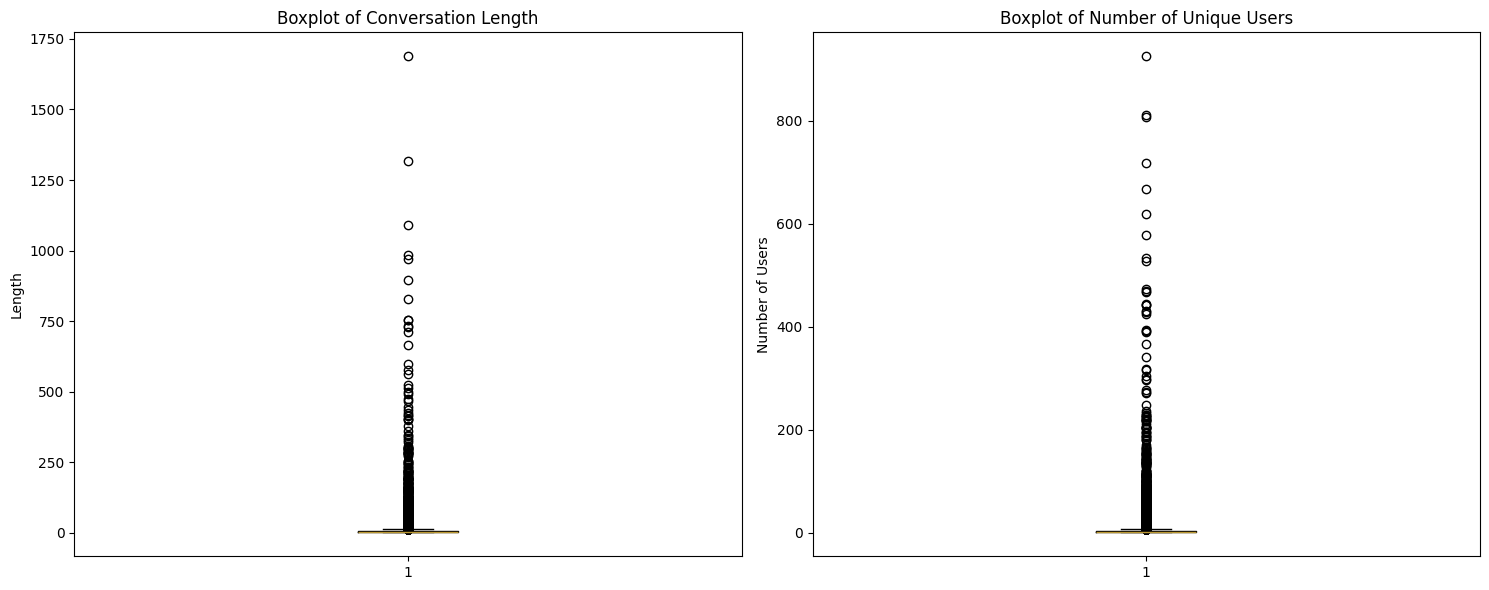

In [12]:
# Create boxplots for length and number of unique users in conversations
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Boxplot for Length
axes[0].boxplot(df['Length'])
axes[0].set_title('Boxplot of Conversation Length')
axes[0].set_ylabel('Length')

# Boxplot for Num_users
axes[1].boxplot(df['Num_users'])
axes[1].set_title('Boxplot of Number of Unique Users')
axes[1].set_ylabel('Number of Users')

plt.tight_layout()
plt.show()

## Step 12: Toxic Replies Histogram

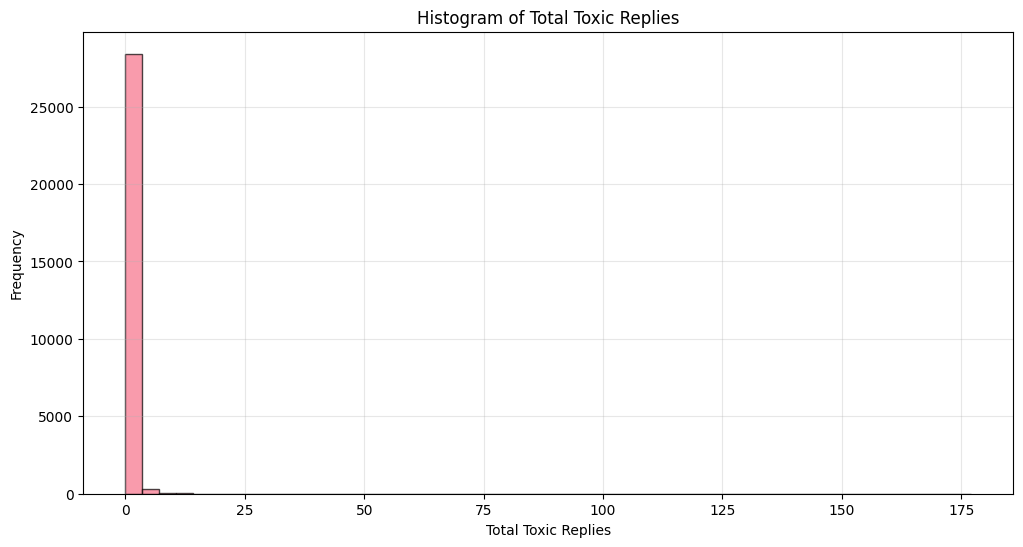

In [13]:
# Create a histogram of Total_toxic_replies
plt.figure(figsize=(12, 6))
plt.hist(df['Total_toxic_replies'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Histogram of Total Toxic Replies')
plt.xlabel('Total Toxic Replies')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

**Interpretation:** The distribution of total toxic replies shows how toxicity is distributed across conversations. This helps us understand the frequency and pattern of toxic content in Twitter conversations.

## Step 13: Toxic Conversation Count

In [14]:
# Get value count for Toxic_conversation
toxic_counts = df['Toxic_conversation'].value_counts()
print("Value counts for Toxic_conversation:")
print(toxic_counts)
print(f"\nPercentage breakdown:")
print(df['Toxic_conversation'].value_counts(normalize=True) * 100)

Value counts for Toxic_conversation:
Toxic_conversation
0    21613
1     7205
Name: count, dtype: int64

Percentage breakdown:
Toxic_conversation
0    74.998265
1    25.001735
Name: proportion, dtype: float64


**Interpretation:** This shows us how many conversations contain toxic replies versus those that don't, giving us insight into the prevalence of toxicity in Twitter conversations.

## Step 14: Author Replies Histogram

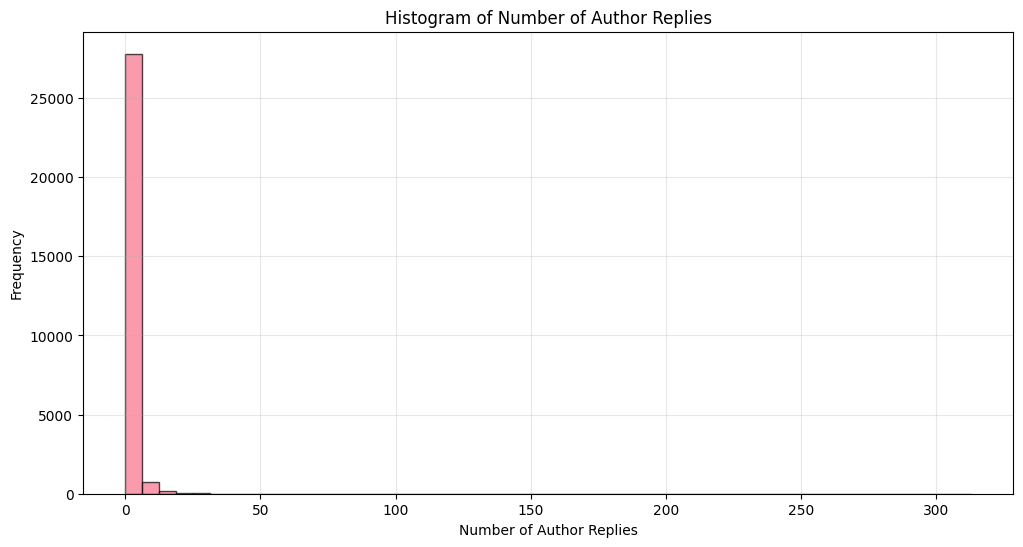

In [15]:
# Create a histogram of Num_author_replies
plt.figure(figsize=(12, 6))
plt.hist(df['Num_author_replies'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Histogram of Number of Author Replies')
plt.xlabel('Number of Author Replies')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

**Interpretation:** The distribution shows how often original tweet authors engage in their own conversation threads by replying. This reveals engagement patterns of content creators.

## Step 15: Account Age Histogram

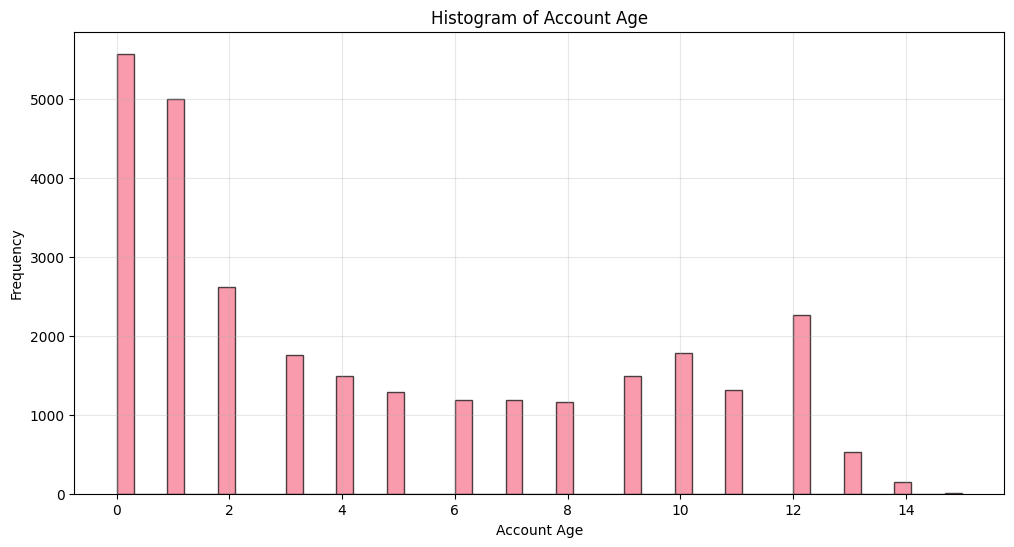

In [16]:
# Create a histogram of users' account age
plt.figure(figsize=(12, 6))
plt.hist(df['Age'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Histogram of Account Age')
plt.xlabel('Account Age')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

**Interpretation:** The distribution of account ages shows the maturity of Twitter accounts in our dataset, which can be related to user experience and behavior patterns.

## Step 16: Toxic vs Non-toxic Length

In [17]:
# Using groupby, find mean length of toxic vs. non-toxic conversations
length_by_toxicity = df.groupby('Toxic_conversation')['Length'].mean()
print("Mean length of conversations by toxicity:")
print(length_by_toxicity)
print(f"\nNon-toxic conversations (0): {length_by_toxicity[0]:.2f}")
print(f"Toxic conversations (1): {length_by_toxicity[1]:.2f}")

Mean length of conversations by toxicity:
Toxic_conversation
0     5.412483
1    17.877307
Name: Length, dtype: float64

Non-toxic conversations (0): 5.41
Toxic conversations (1): 17.88


**Interpretation:** Comparing the mean lengths shows us whether toxic conversations tend to be longer or shorter than non-toxic ones, which can indicate different engagement patterns.

## Step 17: Verified vs Non-verified Followers

In [18]:
# Using groupby, find mean number of followers of verified vs. non-verified users
followers_by_verification = df.groupby('Verified')['Followers'].mean()
print("Mean number of followers by verification status:")
print(followers_by_verification)
print(f"\nNon-verified users (0): {followers_by_verification[0]:.2f}")
print(f"Verified users (1): {followers_by_verification[1]:.2f}")

Mean number of followers by verification status:
Verified
False      6022.879054
True     572177.384670
Name: Followers, dtype: float64

Non-verified users (0): 6022.88
Verified users (1): 572177.38


**Interpretation:** This comparison shows the significant difference in follower counts between verified and non-verified users, as expected since verification is typically given to notable accounts.

## Step 18: Tweets by Account Age

Mean tweets by account age (first 10 rows):
   Age   mean_tweets
0    0   5373.940649
1    1  15108.871605
2    2  20949.909438
3    3  24357.895632
4    4  28330.858776
5    5  33349.213127
6    6  31184.233864
7    7  41906.631313
8    8  42550.933219
9    9  52964.504365


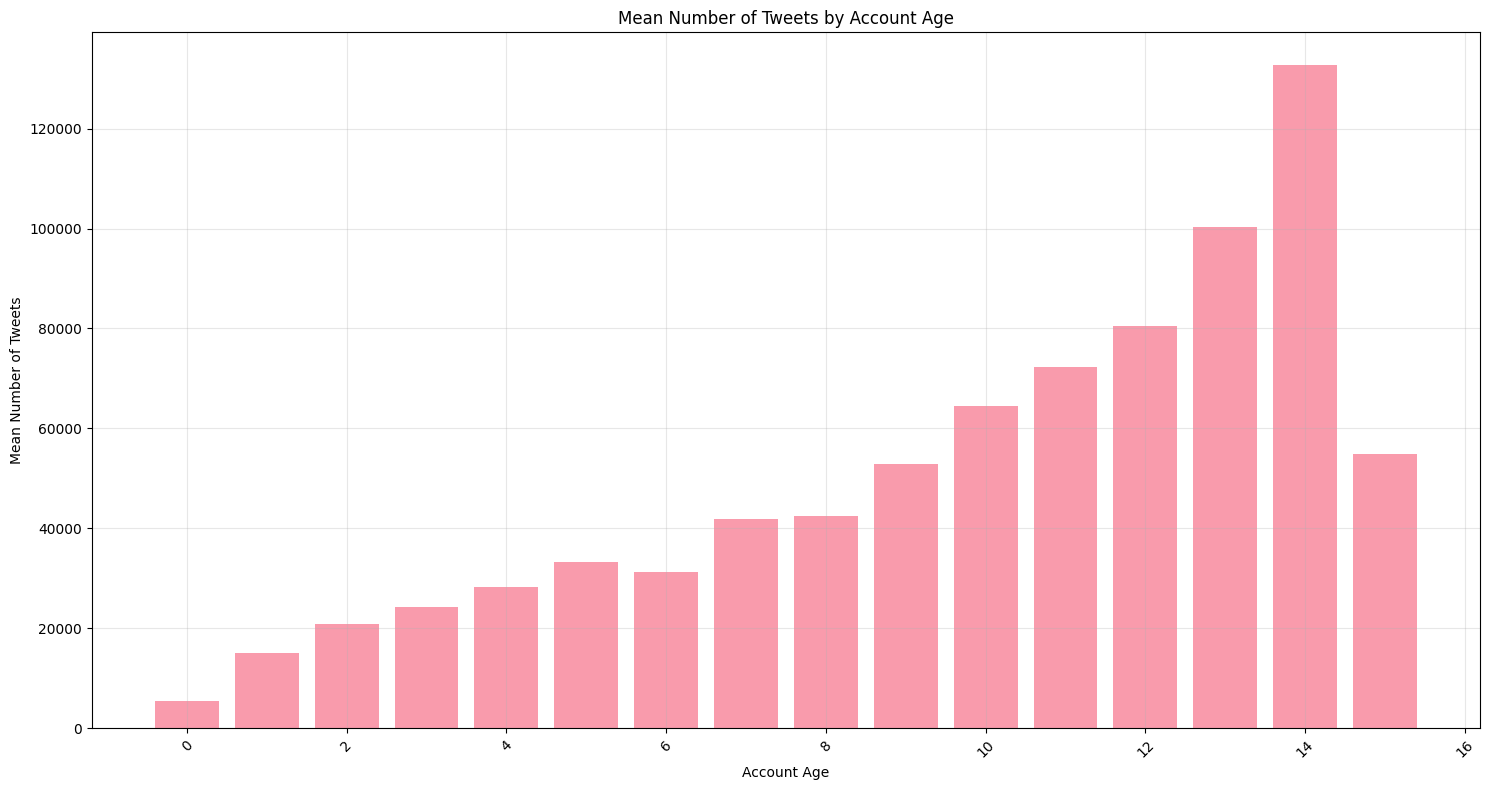

In [19]:
# Using groupby, get mean number of posted tweets by main user for each account age
tweets_by_age = df.groupby('Age')['Num_tweets'].mean().reset_index()
tweets_by_age.columns = ['Age', 'mean_tweets']
print("Mean tweets by account age (first 10 rows):")
print(tweets_by_age.head(10))

# Plot bar chart with account age on x-axis and mean_tweets on y-axis
plt.figure(figsize=(15, 8))
plt.bar(tweets_by_age['Age'], tweets_by_age['mean_tweets'], alpha=0.7)
plt.title('Mean Number of Tweets by Account Age')
plt.xlabel('Account Age')
plt.ylabel('Mean Number of Tweets')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Interpretation:** The bar chart shows the relationship between account age and tweeting activity. This reveals how user activity patterns change with account maturity.

## Step 19: Crosstab Analysis

In [20]:
# Create a crosstab of Toxic_conversation and verified columns
crosstab_result = pd.crosstab(df['Toxic_conversation'], df['Verified'], margins=True)
print("Crosstab of Toxic_conversation and Verified:")
print(crosstab_result)

# Calculate percentages
crosstab_pct = pd.crosstab(df['Toxic_conversation'], df['Verified'], normalize='index') * 100
print("\nPercentage breakdown by row:")
print(crosstab_pct)

Crosstab of Toxic_conversation and Verified:
Verified            False  True    All
Toxic_conversation                    
0                   20802   811  21613
1                    6607   598   7205
All                 27409  1409  28818

Percentage breakdown by row:
Verified                False     True 
Toxic_conversation                     
0                   96.247629  3.752371
1                   91.700208  8.299792


**Interpretation:** The crosstab shows the relationship between conversation toxicity and user verification status, revealing whether verified users are more or less likely to be involved in toxic conversations.

## Step 20: Chi-square Test

In [21]:
# Using the frequency table, run Chi-square test
# Create contingency table (without margins)
contingency_table = pd.crosstab(df['Toxic_conversation'], df['Verified'])
print("Contingency table for Chi-square test:")
print(contingency_table)

# Perform Chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi-square test results:")
print(f"Chi-square statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of freedom: {dof}")
print(f"\nExpected frequencies:")
print(expected)

alpha = 0.05
print(f"\nAt alpha = {alpha}:")
if p_value < alpha:
    print("Reject H0: There is a significant association between toxicity and verification status")
else:
    print("Fail to reject H0: No significant association between toxicity and verification status")

Contingency table for Chi-square test:
Verified            False  True 
Toxic_conversation              
0                   20802    811
1                    6607    598

Chi-square test results:
Chi-square statistic: 239.3149
P-value: 0.0000
Degrees of freedom: 1

Expected frequencies:
[[20556.27444653  1056.72555347]
 [ 6852.72555347   352.27444653]]

At alpha = 0.05:
Reject H0: There is a significant association between toxicity and verification status


**Interpretation:** 
- **Null Hypothesis (H0)**: There is no association between conversation toxicity and user verification status
- **Alternative Hypothesis (H1)**: There is an association between conversation toxicity and user verification status

The results suggest whether we should reject or fail to reject H0 based on the p-value and significance level.

## Step 21: Data Splitting

In [22]:
# Split dataframe into two: one with toxic conversations, one with non-toxic conversations
toxic_conversations = df[df['Toxic_conversation'] == 1]
non_toxic_conversations = df[df['Toxic_conversation'] == 0]

print("Toxic conversations dataframe:")
print(f"Shape: {toxic_conversations.shape}")
print(toxic_conversations.head())

print("\n" + "="*50 + "\n")

print("Non-toxic conversations dataframe:")
print(f"Shape: {non_toxic_conversations.shape}")
print(non_toxic_conversations.head())

Toxic conversations dataframe:
Shape: (7205, 21)
    Unnamed: 0                Tweet  Followers  Friends  Num_tweets  Verified  \
6            6  1433964061402746882       3467    196.0       10847     False   
13          13  1427325560296919048        161    107.0        2781     False   
15          15  1431806935079088135        150    203.0        2428     False   
26          26  1434938389833261059        729    739.0       21546     False   
33          33  1437598794934374401        304    625.0         465     False   

    Listed_count Location  Age  Length  ...  Num_author_replies  TOXICITY_x  \
6             38     True    0      18  ...                   6    0.020607   
13             0    False    2       2  ...                   0    0.471199   
15             4    False    0       2  ...                   0    0.597204   
26             1     True    9       3  ...                   1    0.149503   
33             0     True    0       7  ...                   1    0.

## Step 22: Toxic Conversation Length Histogram

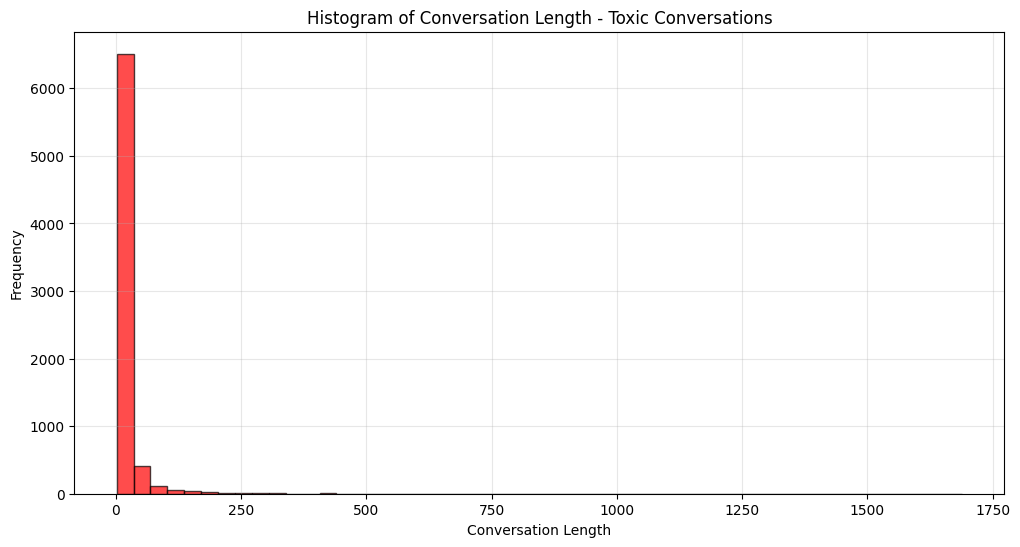

In [23]:
# Plot histogram of conversation length of toxic conversations
plt.figure(figsize=(12, 6))
plt.hist(toxic_conversations['Length'], bins=50, edgecolor='black', alpha=0.7, color='red')
plt.title('Histogram of Conversation Length - Toxic Conversations')
plt.xlabel('Conversation Length')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

**Interpretation:** The distribution shows how conversation lengths are distributed specifically for toxic conversations, revealing patterns in the engagement levels of problematic discussions.

## Step 23: Non-toxic Conversation Length Histogram

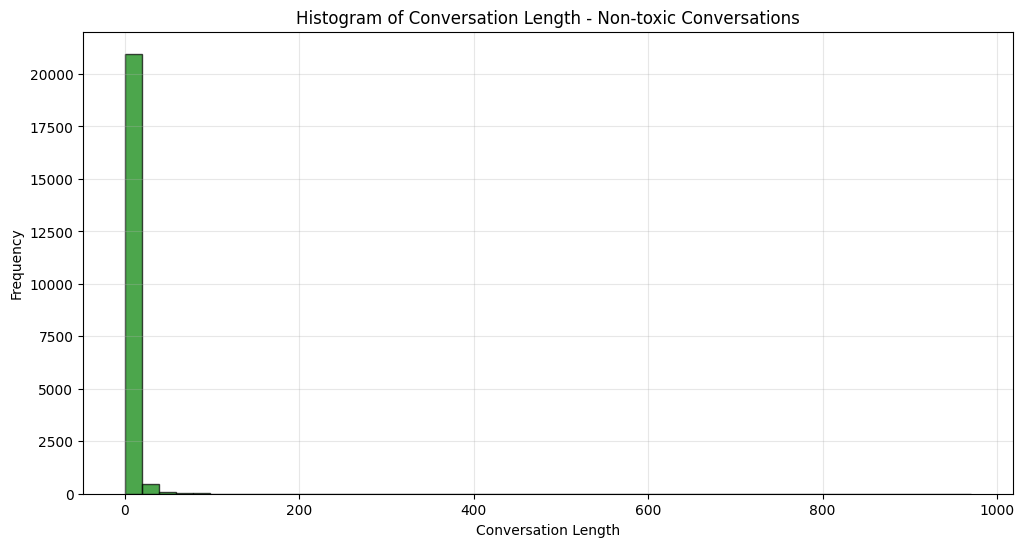

In [24]:
# Plot histogram of conversation length of non-toxic conversations
plt.figure(figsize=(12, 6))
plt.hist(non_toxic_conversations['Length'], bins=50, edgecolor='black', alpha=0.7, color='green')
plt.title('Histogram of Conversation Length - Non-toxic Conversations')
plt.xlabel('Conversation Length')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

**Interpretation:** The distribution of non-toxic conversation lengths can be compared with Step 22 to identify differences in engagement patterns between toxic and non-toxic discussions. This comparison helps understand how conversation dynamics differ between the two types.

## Step 24: Mann-Whitney Test for Length

In [25]:
# Run Mann-Whitney test to compare lengths of toxic vs. non-toxic conversations
toxic_lengths = toxic_conversations['Length']
non_toxic_lengths = non_toxic_conversations['Length']

# Perform Mann-Whitney U test
mw_stat, mw_p_value = mannwhitneyu(toxic_lengths, non_toxic_lengths, alternative='two-sided')

print("Mann-Whitney Test for Conversation Length:")
print(f"Mann-Whitney U statistic: {mw_stat:.4f}")
print(f"P-value: {mw_p_value:.4f}")

print(f"\nDescriptive statistics:")
print(f"Toxic conversations - Median length: {toxic_lengths.median():.2f}")
print(f"Non-toxic conversations - Median length: {non_toxic_lengths.median():.2f}")

alpha = 0.05
print(f"\nAt alpha = {alpha}:")
if mw_p_value < alpha:
    print("Reject H0: There is a significant difference in conversation lengths")
else:
    print("Fail to reject H0: No significant difference in conversation lengths")

Mann-Whitney Test for Conversation Length:
Mann-Whitney U statistic: 113183967.0000
P-value: 0.0000

Descriptive statistics:
Toxic conversations - Median length: 7.00
Non-toxic conversations - Median length: 3.00

At alpha = 0.05:
Reject H0: There is a significant difference in conversation lengths


**Interpretation:**
- **Null Hypothesis (H0)**: There is no difference in conversation lengths between toxic and non-toxic conversations
- **Alternative Hypothesis (H1)**: There is a difference in conversation lengths between toxic and non-toxic conversations

The test results indicate whether we should reject or fail to reject H0 based on the p-value.

## Step 25: Toxic Users Histogram

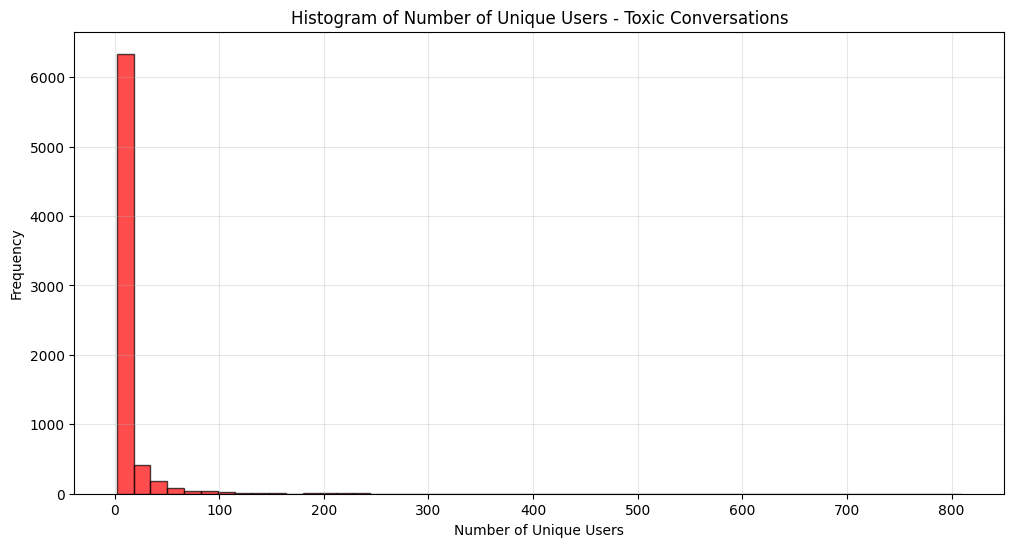

In [26]:
# Plot histogram of number of unique users of toxic conversations
plt.figure(figsize=(12, 6))
plt.hist(toxic_conversations['Num_users'], bins=50, edgecolor='black', alpha=0.7, color='red')
plt.title('Histogram of Number of Unique Users - Toxic Conversations')
plt.xlabel('Number of Unique Users')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

**Interpretation:** The distribution shows how many unique users typically participate in toxic conversations, revealing participation patterns in problematic discussions.

## Step 26: Non-toxic Users Histogram

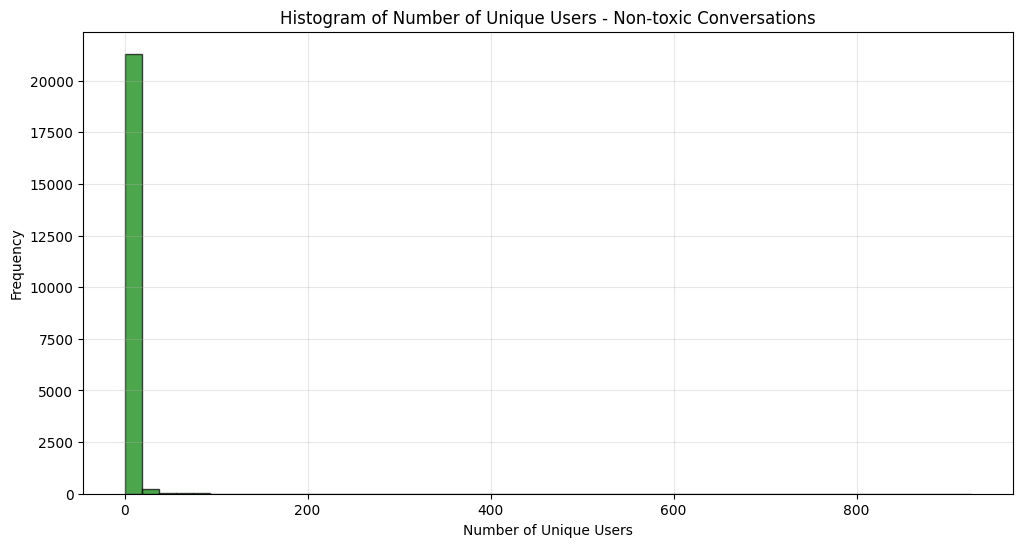

In [27]:
# Plot histogram of number of unique users of non-toxic conversations
plt.figure(figsize=(12, 6))
plt.hist(non_toxic_conversations['Num_users'], bins=50, edgecolor='black', alpha=0.7, color='green')
plt.title('Histogram of Number of Unique Users - Non-toxic Conversations')
plt.xlabel('Number of Unique Users')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

**Interpretation:** This distribution can be compared with Step 25 to understand differences in user participation patterns between toxic and non-toxic conversations.

## Step 27: Mann-Whitney Test for Users

In [28]:
# Run Mann-Whitney test to compare number of unique users of toxic vs. non-toxic conversations
toxic_users = toxic_conversations['Num_users']
non_toxic_users = non_toxic_conversations['Num_users']

# Perform Mann-Whitney U test
mw_stat_users, mw_p_value_users = mannwhitneyu(toxic_users, non_toxic_users, alternative='two-sided')

print("Mann-Whitney Test for Number of Unique Users:")
print(f"Mann-Whitney U statistic: {mw_stat_users:.4f}")
print(f"P-value: {mw_p_value_users:.4f}")

print(f"\nDescriptive statistics:")
print(f"Toxic conversations - Median users: {toxic_users.median():.2f}")
print(f"Non-toxic conversations - Median users: {non_toxic_users.median():.2f}")

alpha = 0.05
print(f"\nAt alpha = {alpha}:")
if mw_p_value_users < alpha:
    print("Reject H0: There is a significant difference in number of unique users")
else:
    print("Fail to reject H0: No significant difference in number of unique users")

Mann-Whitney Test for Number of Unique Users:
Mann-Whitney U statistic: 108388312.5000
P-value: 0.0000

Descriptive statistics:
Toxic conversations - Median users: 4.00
Non-toxic conversations - Median users: 2.00

At alpha = 0.05:
Reject H0: There is a significant difference in number of unique users


**Interpretation:**
- **Null Hypothesis (H0)**: There is no difference in the number of unique users between toxic and non-toxic conversations
- **Alternative Hypothesis (H1)**: There is a difference in the number of unique users between toxic and non-toxic conversations

The test results indicate whether we should reject or fail to reject H0.

## Step 28: T-tests Comparison

In [29]:
# Run t-tests for the tasks in Steps 27 and 24

# T-test for conversation lengths (Step 24 comparison)
t_stat_length, t_p_value_length = ttest_ind(toxic_lengths, non_toxic_lengths)
print("T-test for Conversation Length:")
print(f"T-statistic: {t_stat_length:.4f}")
print(f"P-value: {t_p_value_length:.4f}")

# T-test for number of users (Step 27 comparison)
t_stat_users, t_p_value_users = ttest_ind(toxic_users, non_toxic_users)
print("\nT-test for Number of Unique Users:")
print(f"T-statistic: {t_stat_users:.4f}")
print(f"P-value: {t_p_value_users:.4f}")

# Compare with Mann-Whitney results
print("\n" + "="*60)
print("COMPARISON OF RESULTS:")
print("="*60)
print(f"\nConversation Length:")
print(f"Mann-Whitney p-value: {mw_p_value:.4f}")
print(f"T-test p-value: {t_p_value_length:.4f}")
print(f"Results similar: {abs(mw_p_value - t_p_value_length) < 0.01}")

print(f"\nNumber of Users:")
print(f"Mann-Whitney p-value: {mw_p_value_users:.4f}")
print(f"T-test p-value: {t_p_value_users:.4f}")
print(f"Results similar: {abs(mw_p_value_users - t_p_value_users) < 0.01}")

# Check normality assumptions for t-test
from scipy.stats import shapiro
print("\n" + "="*60)
print("NORMALITY TESTS (for t-test appropriateness):")
print("="*60)

# Sample data for normality test (full data might be too large)
sample_size = min(5000, len(toxic_lengths), len(non_toxic_lengths))
toxic_sample = toxic_lengths.sample(sample_size, random_state=42)
non_toxic_sample = non_toxic_lengths.sample(sample_size, random_state=42)

_, p_normal_toxic = shapiro(toxic_sample)
_, p_normal_non_toxic = shapiro(non_toxic_sample)

print(f"Shapiro-Wilk test for normality (sample of {sample_size}):")
print(f"Toxic lengths p-value: {p_normal_toxic:.4f}")
print(f"Non-toxic lengths p-value: {p_normal_non_toxic:.4f}")

if p_normal_toxic < 0.05 or p_normal_non_toxic < 0.05:
    print("\nData is NOT normally distributed - Mann-Whitney test is more appropriate")
else:
    print("\nData appears normally distributed - both tests are appropriate")

T-test for Conversation Length:
T-statistic: 32.1488
P-value: 0.0000

T-test for Number of Unique Users:
T-statistic: 28.7175
P-value: 0.0000

COMPARISON OF RESULTS:

Conversation Length:
Mann-Whitney p-value: 0.0000
T-test p-value: 0.0000
Results similar: True

Number of Users:
Mann-Whitney p-value: 0.0000
T-test p-value: 0.0000
Results similar: True

NORMALITY TESTS (for t-test appropriateness):
Shapiro-Wilk test for normality (sample of 5000):
Toxic lengths p-value: 0.0000
Non-toxic lengths p-value: 0.0000

Data is NOT normally distributed - Mann-Whitney test is more appropriate


**Interpretation:**
The comparison between Mann-Whitney tests and t-tests helps us understand:

1. **Similarity of Results**: Whether both tests give similar conclusions
2. **Test Appropriateness**: 
   - **Mann-Whitney test**: Non-parametric, doesn't assume normal distribution, more robust to outliers
   - **T-test**: Parametric, assumes normal distribution, more powerful when assumptions are met

3. **Which test is more appropriate**: Based on the normality of the data, Mann-Whitney is generally more appropriate for non-normal distributions, while t-tests are preferred when data is normally distributed. Given the nature of social media data (often skewed), Mann-Whitney tests are typically more reliable.

## Summary

This exploratory data analysis has provided comprehensive insights into the Twitter conversation dataset:

1. **Data Quality**: Cleaned dataset by removing missing values and duplicates
2. **Feature Engineering**: Created binary toxicity indicators and composite measures
3. **Descriptive Statistics**: Analyzed distributions of key variables
4. **Comparative Analysis**: Examined differences between toxic and non-toxic conversations
5. **Statistical Testing**: Applied appropriate tests to validate observed differences

The analysis reveals important patterns in Twitter conversation dynamics and toxicity that can inform future research and content moderation strategies.